# Healthcare Insurance

In [1]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor, XGBRFRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn import metrics

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
N_SEED = 19
TOP_K = 5
VERBOSE = 1
N_JOBS = 4
DOT_SIZE = 4
TEST_SIZE = 0.3

COLOR_MAP = "RdYlBu"
L_FONT = {
    "color": "darkblue",
    "size": 11
}

T_COLOR = "darkred"

np.random.seed(N_SEED)
plt.style.use("ggplot")

In [ ]:
def show_corr(features, target):
    features.corrwith(target).plot.bar(color="orange", grid=True)
    ax = plt.gca()
    ax.spines["bottom"].set_color(T_COLOR)
    ax.spines["top"].set_color(T_COLOR)
    ax.spines["left"].set_color(T_COLOR)
    ax.spines["right"].set_color(T_COLOR)
    ax.tick_params(axis="x", colors=T_COLOR)
    ax.tick_params(axis="y", colors=T_COLOR)
    plt.show();


def show_corr_heatmap(data):
    corr = data.corr() * 100
    sns.heatmap(
        corr,
        annot=True,
        cmap=COLOR_MAP,
        fmt=".2f",
        vmax=100,
        vmin=-100,
    )
    ax = plt.gca()
    ax.spines["bottom"].set_color(T_COLOR)
    ax.spines["top"].set_color(T_COLOR)
    ax.spines["left"].set_color(T_COLOR)
    ax.spines["right"].set_color(T_COLOR)
    ax.tick_params(axis="x", colors=T_COLOR)
    ax.tick_params(axis="y", colors=T_COLOR)
    plt.show();


def plot_features(x, y):
    for col in x.columns:
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_figwidth(12)
        fig.suptitle("X: {i}".format(i=col), fontdict={"color": "darkblue"})
        ax1.scatter(x[col], y, color="red", s=DOT_SIZE,)
        ax1.spines["bottom"].set_color(T_COLOR)
        ax1.spines["top"].set_color(None)
        ax1.spines["left"].set_color(T_COLOR)
        ax1.spines["right"].set_color(None)
        ax1.tick_params(axis="x", colors=T_COLOR)
        ax1.tick_params(axis="y", colors=T_COLOR)
        ax2.hist(x[col], color="orange")
        ax2.spines["bottom"].set_color(T_COLOR)
        ax2.spines["top"].set_color(None)
        ax2.spines["left"].set_color(T_COLOR)
        ax2.spines["right"].set_color(None)
        ax2.tick_params(axis="x", colors=T_COLOR)
        ax2.tick_params(axis="y", colors=T_COLOR)
        plt.show();

In [4]:
dataset = pd.read_csv("../data/insurance.csv")

## EDA

In [5]:
dataset.head(TOP_K)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
dataset.isnull().values.sum()

0

In [9]:
sex_df = LabelEncoder().fit_transform(dataset["sex"])
smoker_df = LabelEncoder().fit_transform(dataset["smoker"])
region_df = LabelEncoder().fit_transform(dataset["region"])

y_df = dataset["charges"]
X_df = dataset.drop(columns=["charges"], axis=1)

X_df["sex"] = pd.Series(sex_df)
X_df["smoker"] = pd.Series(smoker_df)
X_df["region"] = pd.Series(region_df)

dataset_transformed = X_df.copy()
dataset_transformed["charges"] = y_df

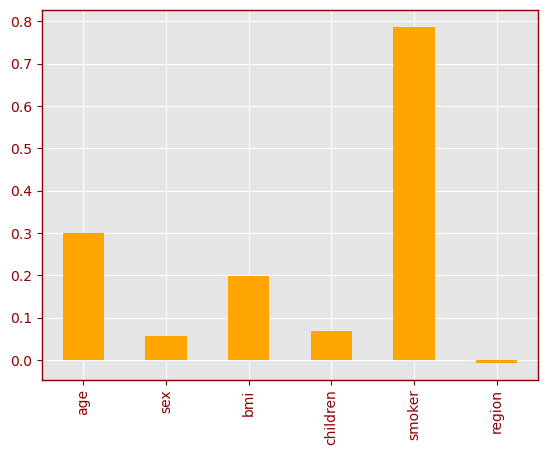

In [10]:
show_corr(X_df, y_df)

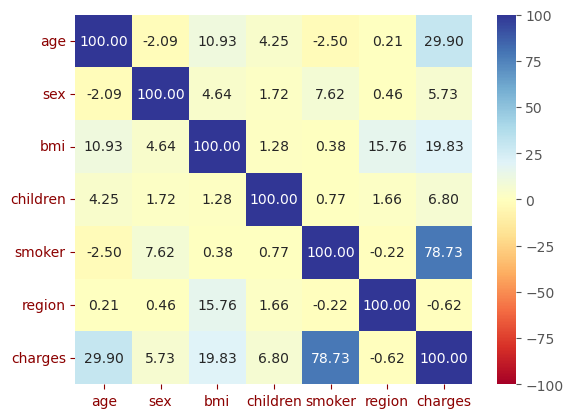

In [11]:
show_corr_heatmap(dataset_transformed)

In [12]:
X = np.array(X_df)
y = np.array(y_df)

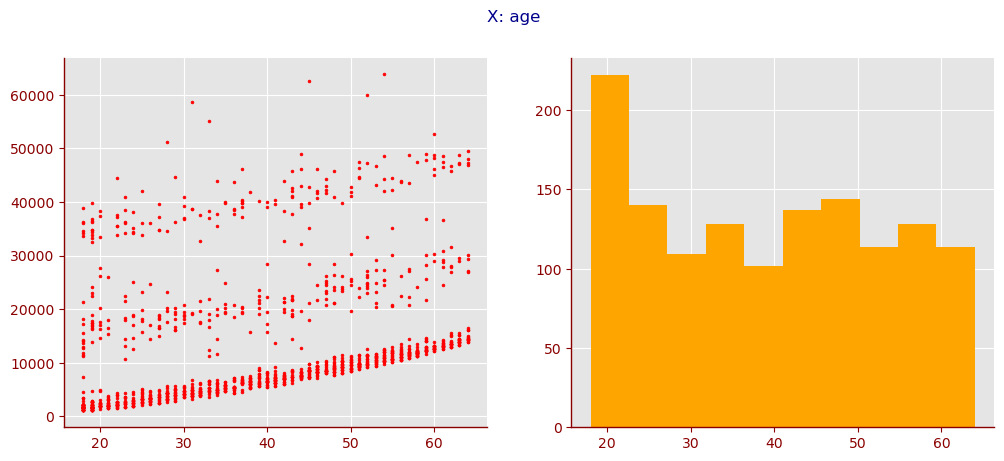

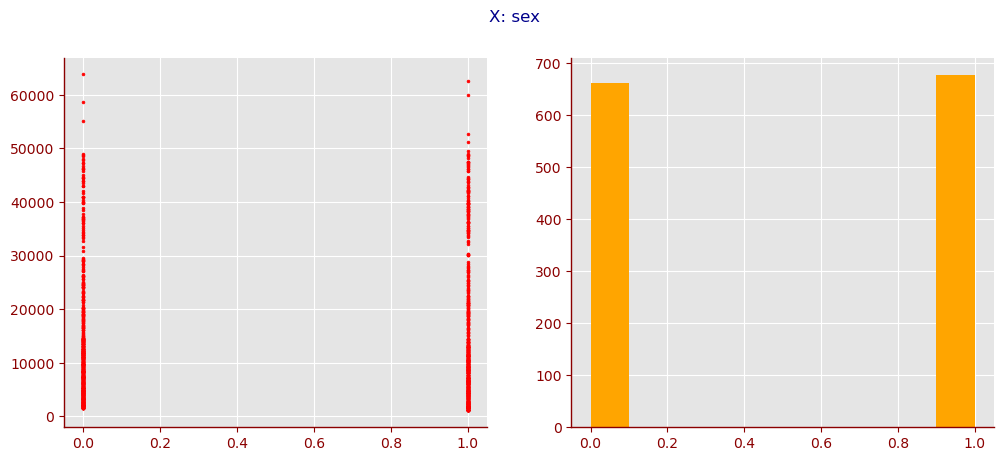

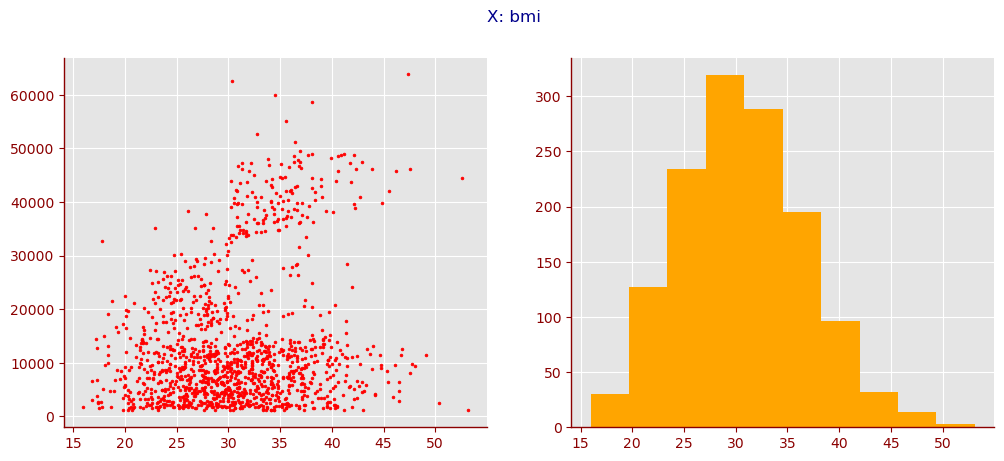

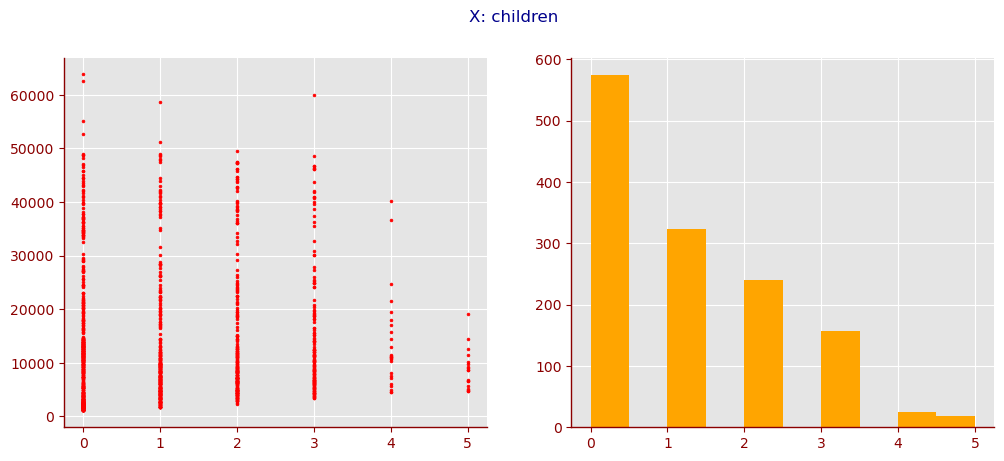

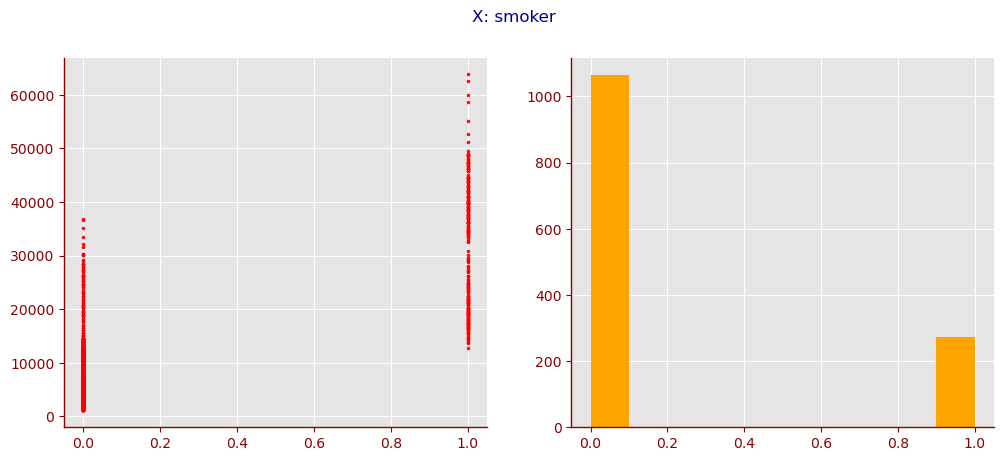

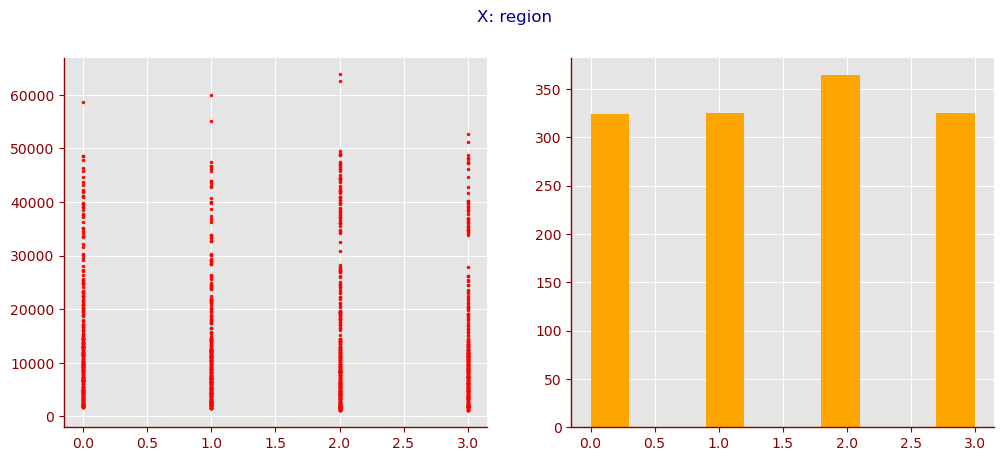

In [13]:
plot_features(X_df, y_df)

In [14]:
# Scale all X
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [15]:
# Split X, y to train set and test set
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=TEST_SIZE,
    random_state=N_SEED,
    shuffle=True,
)

benchmark = []

## Random Forest Regressor

In [16]:
model_RFR = RandomForestRegressor(
    n_estimators=10000,
    n_jobs=N_JOBS,
    random_state=N_SEED,
    verbose=VERBOSE,
)

model_RFR.fit(X_train, y_train)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 2442 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 3192 tasks      | elapsed:    1.5s
[Parallel(n_jobs=4)]: Done 4042 tasks      | elapsed:    1.9s
[Parallel(n_jobs=4)]: Done 4992 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 6042 tasks      | elapsed:    2.8s
[Parallel(n_jobs=4)]: Done 7192 tasks      | elapsed:    3.2s
[Parallel(n_jobs=4)]: Done 8442 tasks      | elapsed:    3.8s
[Parallel(n_jobs=4)]: Done 9792 tasks      | elapsed:    4.4s
[Parallel(n_jobs=4)]: Done 10000 out of 10000 | elapsed:

RandomForestRegressor(n_estimators=10000, n_jobs=4, random_state=19, verbose=1)

In [17]:
y_pred_RFR = model_RFR.predict(X_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 2442 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 3192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 4042 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 4992 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 6042 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 7192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 8442 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 9792 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 10000 out of 10000 | elapsed:

In [18]:
y_test[:TOP_K]

array([34472.841  ,  4889.0368 , 12105.32   , 21232.18226,  6435.6237 ])

In [19]:
y_pred_RFR[:TOP_K]

array([35613.95788977,  5239.48881526, 15028.12632702,  9180.02542147,
       10951.00105933])

In [20]:
rmse_RFR = metrics.root_mean_squared_error(y_test, y_pred_RFR)
mae_RFR = metrics.mean_absolute_error(y_test, y_pred_RFR)

In [21]:
rmse_RFR, mae_RFR

(4805.245236174042, 2660.655357946705)

In [22]:
benchmark.append(
    [
        "Random Forest Regressor",
         rmse_RFR,
         mae_RFR,
    ]
)

## XGBoost Regressor

In [23]:
model_XGBR = XGBRegressor(
    n_estimators=10000,
    learning_rate=0.05,
    n_jobs=N_JOBS,
    random_state=N_SEED,
    verbosity=3,
)

model_XGBR.fit(X_train, y_train,)

[13:21:20] ======== Monitor (0): HostSketchContainer ========
[13:21:20] AllReduce: 0.000128s, 1 calls @ 128us

[13:21:20] MakeCuts: 0.000153s, 1 calls @ 153us

[13:21:20] DEBUG: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/gbm/gbtree.cc:130: Using tree method: 0
[13:21:22] ======== Monitor (0): Learner ========
[13:21:22] Configure: 0.000142s, 1 calls @ 142us

[13:21:22] EvalOneIter: 0.00473s, 10000 calls @ 4730us

[13:21:22] GetGradient: 0.012779s, 10000 calls @ 12779us

[13:21:22] PredictRaw: 0.001082s, 10000 calls @ 1082us

[13:21:22] UpdateOneIter: 1.39245s, 10000 calls @ 1392454us

[13:21:22] ======== Monitor (0): GBTree ========
[13:21:22] BoostNewTrees: 1.37092s, 10000 calls @ 1370920us

[13:21:22] CommitModel: 0.001016s, 10000 calls @ 1016us

[13:21:22] ======== Monitor (0): HistUpdater ========
[13:21:22] BuildHistogram: 0.278534s, 50000 calls @ 278534us

[13:21:22] EvaluateSplits: 0.536131s, 60000 calls @ 536131us

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10000, n_jobs=4,
             num_parallel_tree=None, random_state=19, ...)

In [24]:
y_pred_XGBR = model_XGBR.predict(X_test)

[13:21:22] DEBUG: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/gbm/gbtree.cc:130: Using tree method: 0


In [25]:
rmse_XGBR = metrics.root_mean_squared_error(y_test, y_pred_XGBR)
mae_XGBR = metrics.mean_absolute_error(y_test, y_pred_XGBR)

In [26]:
rmse_XGBR, mae_XGBR

(5424.687675957326, 3243.184674943933)

In [27]:
benchmark.append(
    [
        "XGB Regressor",
         rmse_XGBR,
         mae_XGBR
    ]
)

## XGBoost Random Forest Regressor

In [28]:
model_XGBRFR = XGBRFRegressor(
    n_estimators=10000,
    n_jobs=N_JOBS,
    random_state=N_SEED,
    verbosity=2,
)

model_XGBRFR.fit(X_train, y_train,)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=10000, n_jobs=4,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=19, reg_alpha=None, ...)

In [29]:
y_pred_XGBRFR = model_XGBRFR.predict(X_test)

In [30]:
rmse_XGBRFR = metrics.root_mean_squared_error(y_test, y_pred_XGBRFR)
mae_XGBRFR = metrics.mean_absolute_error(y_test, y_pred_XGBRFR)

In [31]:
rmse_XGBRFR, mae_XGBRFR

(4589.415396786471, 2598.478652973706)

In [32]:
benchmark.append(
    [
        "XGB Random Forest Regressor",
         rmse_XGBRFR,
         mae_XGBRFR,
    ]
)

## Final Review

In [33]:
benchmark_df = pd.DataFrame(benchmark, columns=["Name", "RMSE", "MAE"])

In [34]:
def show_benchmark(benchmark):
    i = np.arange(len(benchmark))
    mul = 0
    width = 0.4
    _, ax = plt.subplots(layout="constrained")

    for col in benchmark.columns:
        if col != "Name":
            rects = ax.bar(i + mul*width, benchmark[col], width, label=col)
            ax.bar_label(rects, padding=3, color="darkblue")
            ax.set_xticks(i + width/2, benchmark["Name"])
            mul += 1
    ax.spines["bottom"].set_color(T_COLOR)
    ax.spines["top"].set_color(None)
    ax.spines["left"].set_color(T_COLOR)
    ax.spines["right"].set_color(None)
    ax.tick_params(axis="x", colors=T_COLOR)
    ax.tick_params(axis="y", colors=T_COLOR)
    ax.legend(loc="upper right")
    ax.set_title("Benchmarking", fontdict={"color": "darkblue"})
    plt.show();


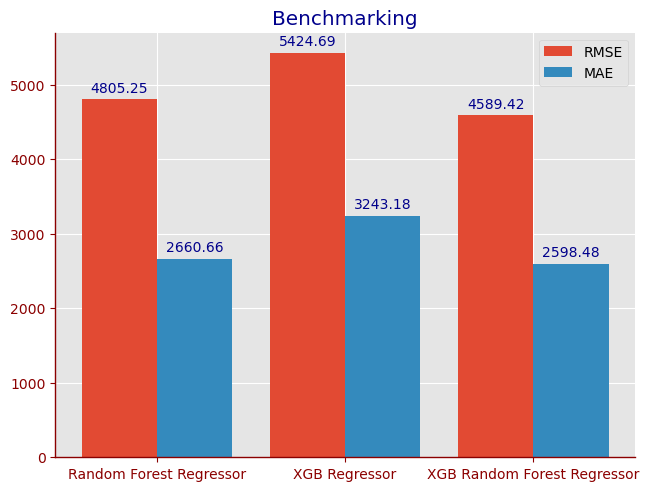

In [35]:
show_benchmark(benchmark_df)